In [ ]:
import sys
sys.path.append("src")

In [16]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression
from src.health import HealthAnalyzer

def load_data(path: str = "data/health_study_dataset.csv") -> pd.DataFrame:

    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(f"Kan inte hitta datafilen: {p.resolve()}")
    
    return pd.read_csv(p)

ImportError: cannot import name 'HealthAnalyzer' from 'src.health' (c:\Users\benri\Desktop\Individuell uppgift – Hälsostudie\src\health.py)

Förklaring för koden ovan: 
Importerar alla nödvändiga paket och skapar en funktion som returnerar en dataframe.
Detta görs först då allt annat utgår från dataframe.

In [14]:
from src.health import HealthAnalyzer
ha = HealthAnalyzer()
ha.df.head()

ImportError: cannot import name 'HealthAnalyzer' from 'src.health' (c:\Users\benri\Desktop\Individuell uppgift – Hälsostudie\src\health.py)

Förklaring för ovan kod : Vi skapar här ett HealthAnalyzer-objekt som laddar datasetet och gör det redo för analys. kör ett head()-anrop för överblick över datans struktur så att vi vet att allt är korrekt laddat.

In [ ]:
ha.describe().round(2)

,mean,median,min,max,count
variable,,,,,
age,49.43,50.00,18.0,90.00,800
weight,73.41,73.20,33.7,114.40,800
height,171.85,171.35,144.4,200.40,800
systolic_bp,149.18,149.40,106.8,185.90,800
cholesterol,4.93,4.97,2.5,7.88,800


Förklaring för ovan cell: 
describe() anropar describe_stats. Visar "mean","median","max","min","count".

In [ ]:
p_real, n_real = ha.prevalence()
print(f"Verklig andel med sjukdomen: {p_real:.3f} (n={n_real})")

Verklig andel med sjukdomen: 0.059 (n=800)


Förklaring för ovan kod: Beräknar prevalensen av sjukdom i datasetet. HealthAnalyzer anropar disease_prevalence, som ger andel och antal fall.

In [ ]:
lo, hi, boots = ha.bp_confidence_interval(n_boot=2000, alpha=0.05)
print(f"Bootstrap 95% CI för medelvärde av systolic_bp: [{lo:.2f}, {hi:.2f}]")

Bootstrap 95% CI för medelvärde av systolic_bp: [148.31, 150.10]


Förklaring för ovan kod: Här beräknas ett bootstrap-konfidensintervall för medelvärdet av systoliskt blodtryck.

In [ ]:
tstat, p_one_sided, n_smokers, n_nonsmokers = ha.test_smoking_bp()
print(f"t-stat: {tstat:.3f}, one-sided p-value (rökare > icke-rökare): {p_one_sided:.4f}")
print(f"Gruppstorlekar: smokers={n_smokers}, non-smokers={n_nonsmokers}")

t-stat: 0.450, one-sided p-value (rökare > icke-rökare): 0.3264
Gruppstorlekar: smokers=213, non-smokers=587


Förklaring för ovan kod: Här testas hypotesen ”Rökare har högre medelblodtryck än icke-rökare”. HealthAnalyzer anropar t_test_smokers_vs_nonsmokers, som utför ett tvågrupps t-test. Resultatet visar om skillnaden i blodtryck är statistiskt signifikant.

Simulerad medelandel (1000 simuleringar): 0.059


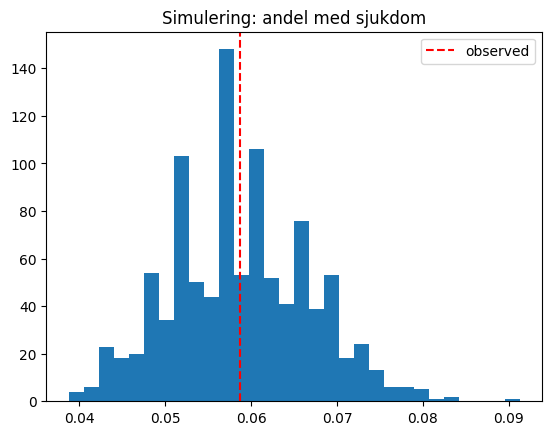

In [ ]:
sims = ha.simulate(n_sim=1000, n_people=n_real)
print(f"Simulerad medelandel (1000 simuleringar): {sims.mean():.3f}")
plt.hist(sims, bins=30)
plt.axvline(p_real, color="red", linestyle="--", label="observed")
plt.legend(); plt.title("Simulering: andel med sjukdom")
plt.show()

Förklaring för ovan kod: Simulering av hur sjukdomsprevalensen kan variera i upprepade stickprov. Här används simulate_disease_prop. Simuleringen är användbar för att förstå samplingvariationen kring prevalensen.

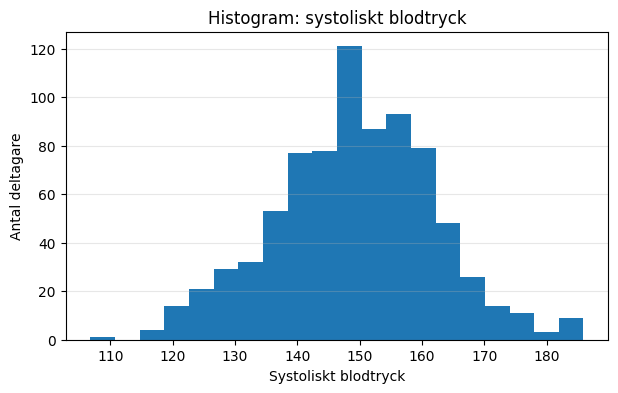

<Figure size 600x500 with 0 Axes>

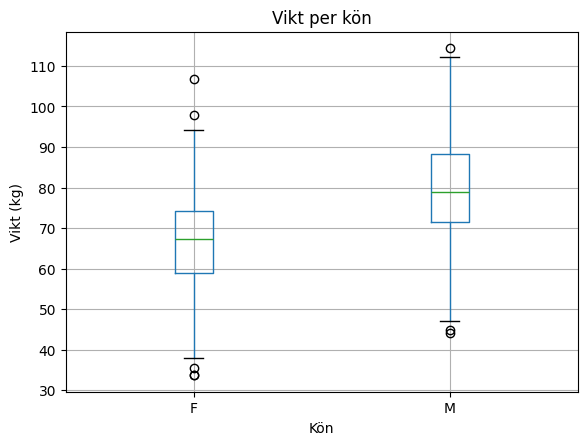

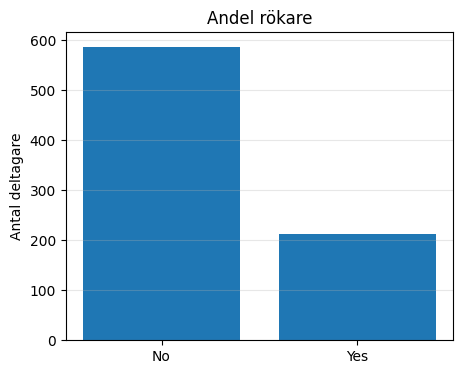

In [ ]:
ha.plot_all()

Förklaring för ovan kod: Slutligen genereras alla visualiseringar som definierats i visualiserings-cellen. De 4 visualiseringarna är : histogram blodtryck, boxplot vikt per kön, stapel andel rökare och scatter för relation mellan ålder och blodtryck.

In [ ]:
model, coef, intercept, r2 = ha.linear_regression()
print("Linjär regression – blodtryck från ålder + vikt")
print("------------------------------------------------")
print(f"Koefficienter:")
print(f"  Ålder: {coef[0]:.4f}")
print(f"  Vikt:  {coef[1]:.4f}")
print(f"Intercept: {intercept:.2f}")
print(f"R² (förklarad varians): {r2:.3f}")

In [ ]:
ha.plot_age_vs_bp()

Resultat del 1 :  Snitt-blodtrycket för icke-rökare var 149.05 medan snittet för rökare är 149,52. Med andra ord har de i princip samma blodtryck(0,3 är inte är skillnad som är signifikant enligt t-testet). Hypotesen "Rökare har högre medel-blodtryck än icke-rökare" går därför inte att styrka baserat på detta urval.

In [ ]:
bp = ha.summary()

Blodtryck – sammanfattning:
Medelvärde: 149.18
Median: 149.40
Standardavvikelse: 12.79
Lägsta: 106.80
Högsta: 185.90
Antal rökare / icke-rökare:
smoker
no     587
yes    213
Name: count, dtype: int64

Andelar (%):
smoker
no     73.38
yes    26.62
Name: proportion, dtype: float64
Verklig andel med sjukdomen: 0.059 (n=800)
Simulering av andel med sjukdom (1000 simuleringar):
Medelvärde: 0.059
Std: 0.008
5:e percentilen: 0.045
95:e percentilen: 0.072
Bootstrap 95% CI: [148.31, 150.10]
Bootstrap-medelvärde: 149.18
Bootstrap-std: 0.45
0.4503433193393224 0.3263669371699499
Rökare:
  Medelvärde: 149.52, n=213
Icke-rökare:
  Medelvärde: 149.05, n=587

T-stat: 0.450, p-värde (ensidigt): 0.3264
